### Code for loading and converting the benchmark data of Stefanello et al. and Gnägi & Baumann

In [57]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

from lib.problems.generator import Generator, load_ccp_instance

sns.set()

In [59]:
ROOT_DIR = f"./data/CCP/benchmark/stefanello/"
DATA_DIR = os.path.join(ROOT_DIR, "raw")
DATA_DIR

'./data/CCP/benchmark/stefanello/raw'

In [60]:
files = os.listdir(DATA_DIR)
files.sort()
files

['ali535_005.txt',
 'ali535_025.txt',
 'ali535_050.txt',
 'fnl4461_0020.txt',
 'lin318_015.txt',
 'pr2392_020.txt',
 'rl1304_010.txt',
 'sjc3a_300_25.txt',
 'sjc4a_402_30.txt',
 'spain737_74_1.txt',
 'u724_010.txt',
 'u724_030.txt']

In [61]:
instances = []
for f in files:
    load_pth = os.path.join(DATA_DIR, f)
    inst = load_ccp_instance(load_pth)
    print(load_pth)
    #print(inst)
    instances.append(inst)

./data/CCP/benchmark/stefanello/raw/ali535_005.txt
./data/CCP/benchmark/stefanello/raw/ali535_025.txt
./data/CCP/benchmark/stefanello/raw/ali535_050.txt
./data/CCP/benchmark/stefanello/raw/fnl4461_0020.txt
./data/CCP/benchmark/stefanello/raw/lin318_015.txt
./data/CCP/benchmark/stefanello/raw/pr2392_020.txt
./data/CCP/benchmark/stefanello/raw/rl1304_010.txt
./data/CCP/benchmark/stefanello/raw/sjc3a_300_25.txt
./data/CCP/benchmark/stefanello/raw/sjc4a_402_30.txt
./data/CCP/benchmark/stefanello/raw/spain737_74_1.txt
./data/CCP/benchmark/stefanello/raw/u724_010.txt
./data/CCP/benchmark/stefanello/raw/u724_030.txt


In [62]:
instances

[CCPInstance( coords=ndarray_[535, 2],  demands=ndarray_[535],  graph_size=535,  constraint_value=1.0,  labels=None,  num_components=5),
 CCPInstance( coords=ndarray_[535, 2],  demands=ndarray_[535],  graph_size=535,  constraint_value=1.0,  labels=None,  num_components=25),
 CCPInstance( coords=ndarray_[535, 2],  demands=ndarray_[535],  graph_size=535,  constraint_value=1.0,  labels=None,  num_components=50),
 CCPInstance( coords=ndarray_[4461, 2],  demands=ndarray_[4461],  graph_size=4461,  constraint_value=1.0,  labels=None,  num_components=20),
 CCPInstance( coords=ndarray_[318, 2],  demands=ndarray_[318],  graph_size=318,  constraint_value=1.0,  labels=None,  num_components=15),
 CCPInstance( coords=ndarray_[2392, 2],  demands=ndarray_[2392],  graph_size=2392,  constraint_value=1.0,  labels=None,  num_components=20),
 CCPInstance( coords=ndarray_[1304, 2],  demands=ndarray_[1304],  graph_size=1304,  constraint_value=1.0,  labels=None,  num_components=10),
 CCPInstance( coords=ndarr

In [63]:
save_pth = os.path.join(ROOT_DIR, f"ccp_bench.npz")
Generator.save_dataset(instances, filepath=save_pth, problem="vrp")

Dataset file with same name exists already. Overwrite file? (y/n)


/mnt/_data/PycharmProjects/cluster2route/lib/problems/generator.py:153: UserWarning: array shapes do not match. Saving as pickled object array.
  else:


'data/CCP/benchmark/stefanello/ccp_bench.npz'

In [64]:
spth = os.path.join(ROOT_DIR, f"ccp_bench.npz")
instances = Generator.load_dataset(spth, allow_pickle=True)
instances

[CCPInstance( coords=ndarray_[535, 2],  demands=ndarray_[535],  graph_size=535,  constraint_value=1.0,  labels=None,  num_components=5),
 CCPInstance( coords=ndarray_[535, 2],  demands=ndarray_[535],  graph_size=535,  constraint_value=1.0,  labels=None,  num_components=25),
 CCPInstance( coords=ndarray_[535, 2],  demands=ndarray_[535],  graph_size=535,  constraint_value=1.0,  labels=None,  num_components=50),
 CCPInstance( coords=ndarray_[4461, 2],  demands=ndarray_[4461],  graph_size=4461,  constraint_value=1.0,  labels=None,  num_components=20),
 CCPInstance( coords=ndarray_[318, 2],  demands=ndarray_[318],  graph_size=318,  constraint_value=1.0,  labels=None,  num_components=15),
 CCPInstance( coords=ndarray_[2392, 2],  demands=ndarray_[2392],  graph_size=2392,  constraint_value=1.0,  labels=None,  num_components=20),
 CCPInstance( coords=ndarray_[1304, 2],  demands=ndarray_[1304],  graph_size=1304,  constraint_value=1.0,  labels=None,  num_components=10),
 CCPInstance( coords=ndarr

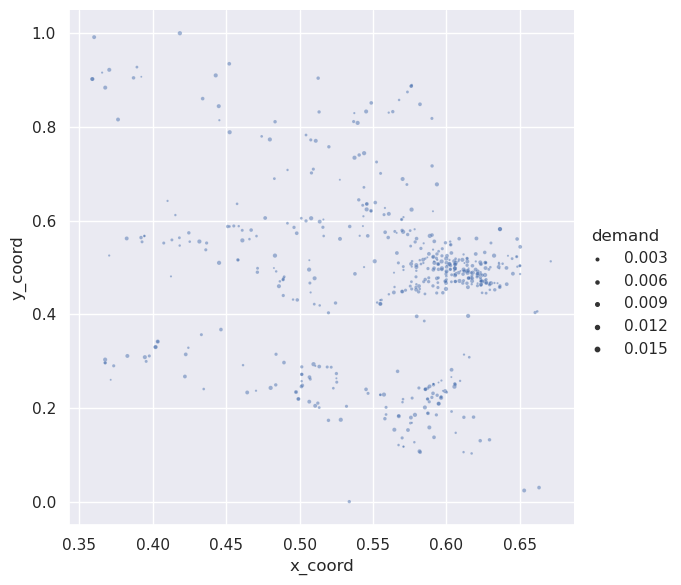

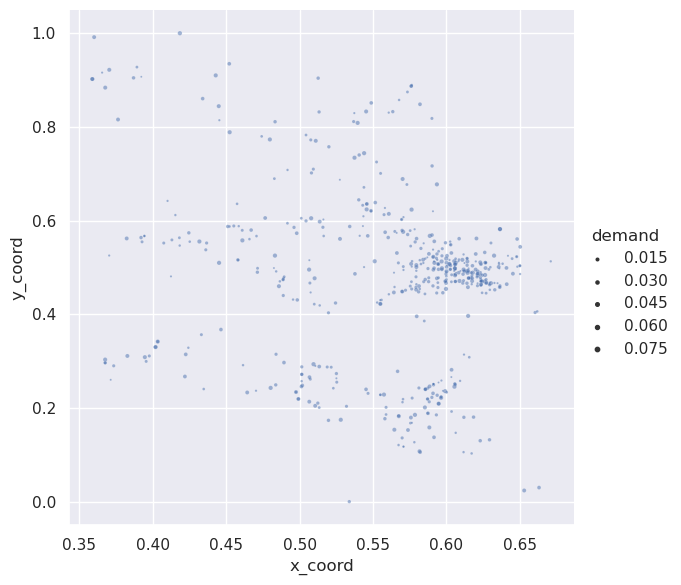

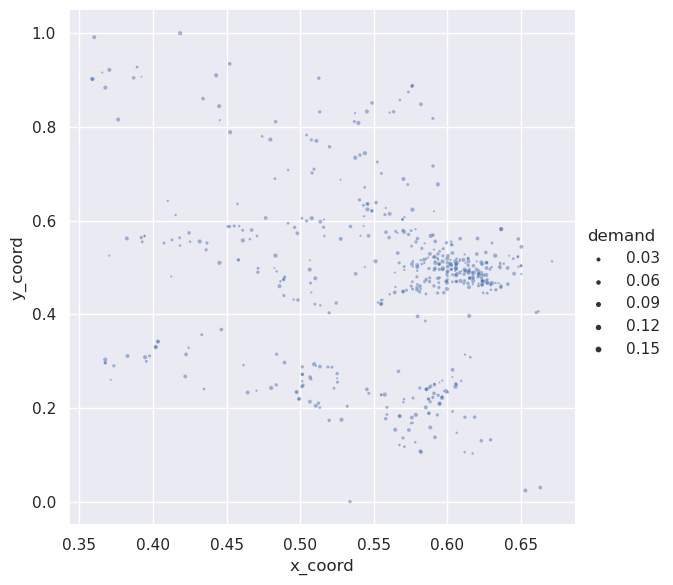

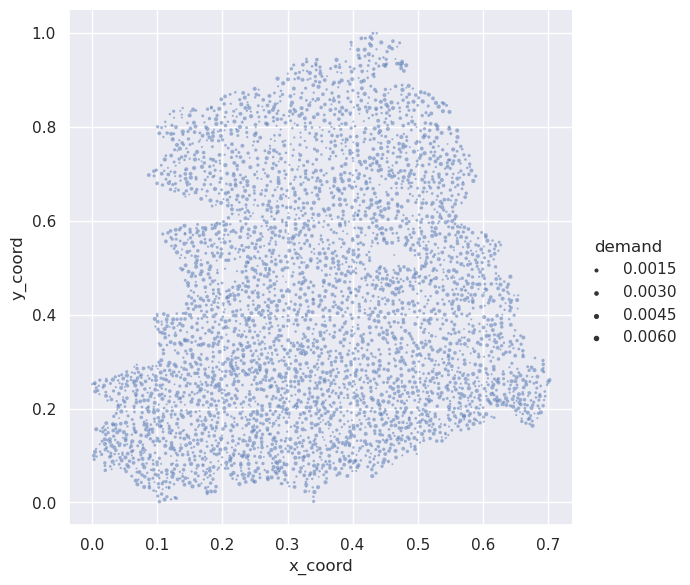

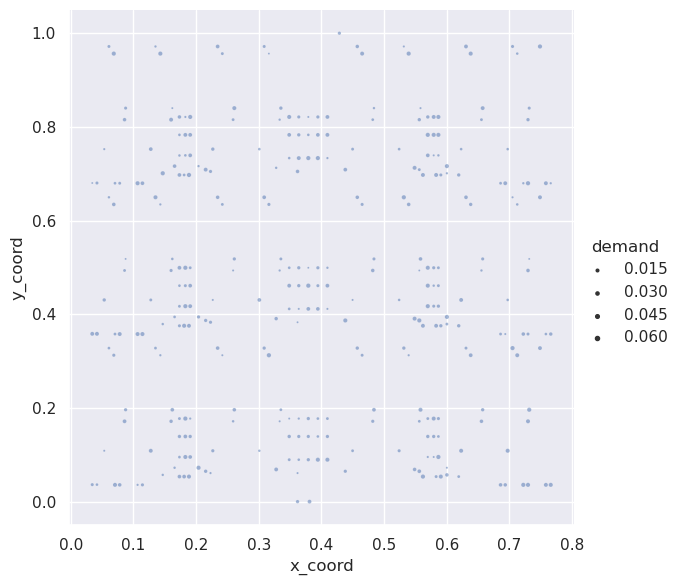

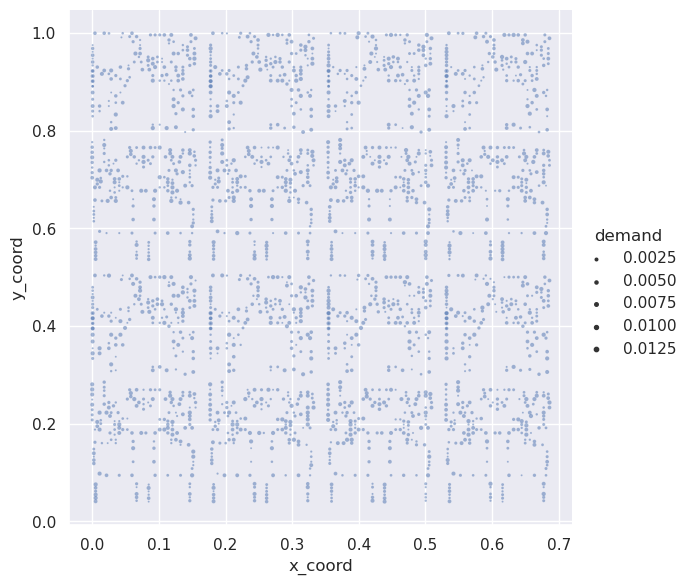

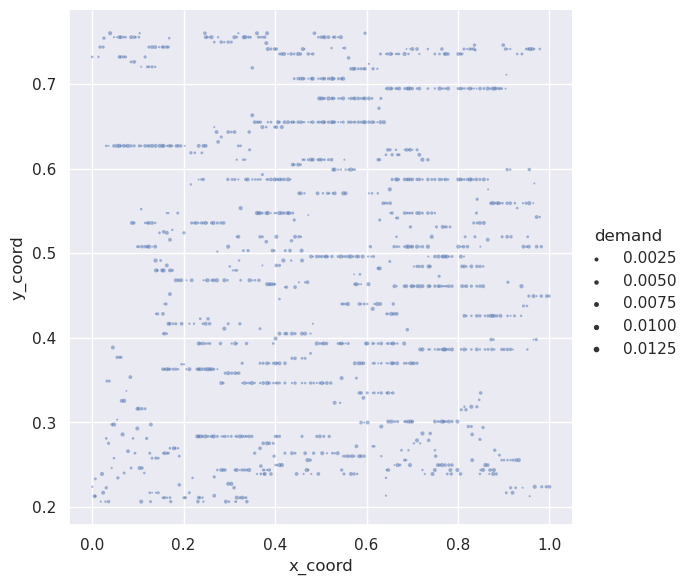

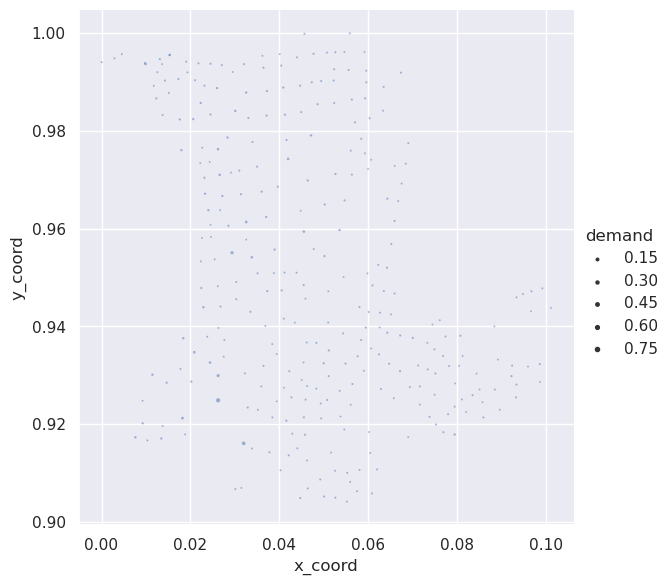

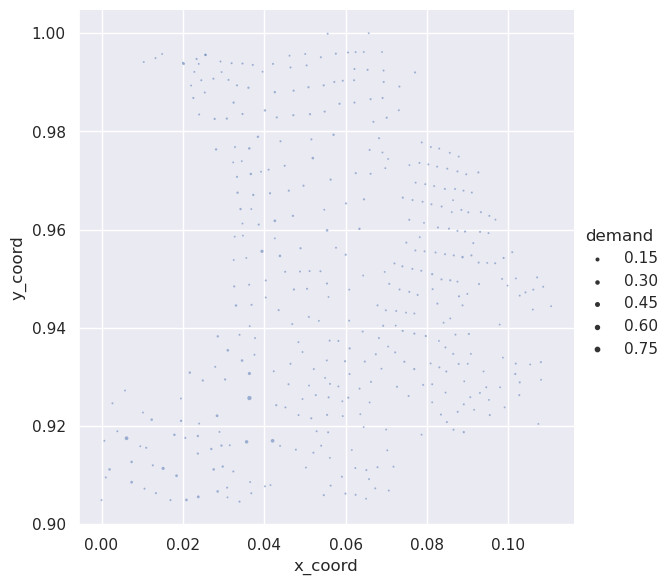

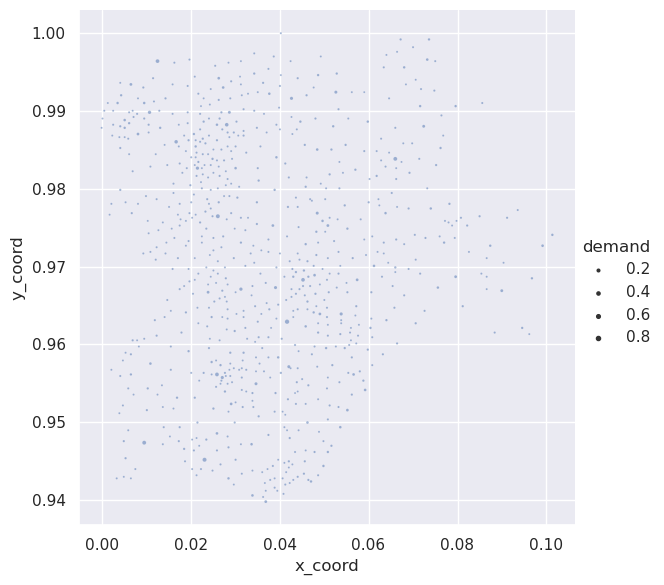

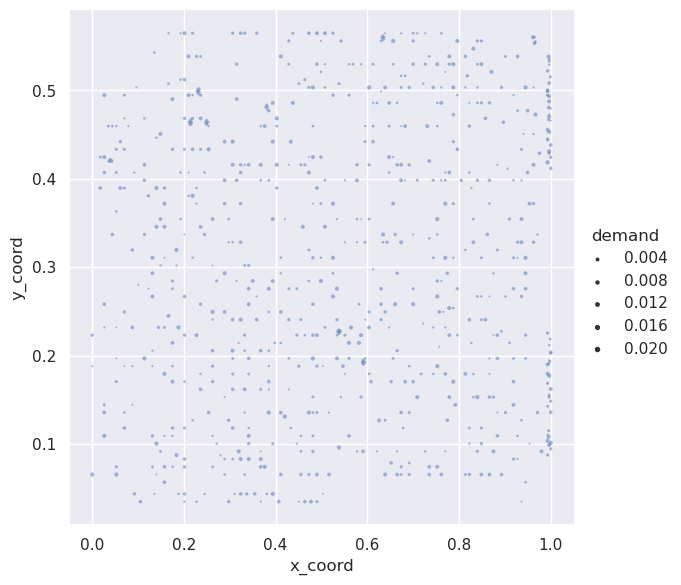

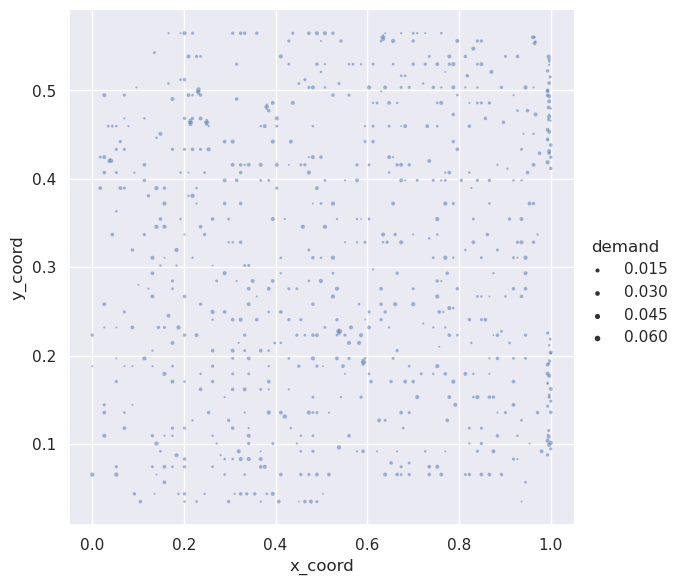

In [65]:
COLS = ["x_coord", "y_coord", "demand"]
for inst in instances:
    df_ = pd.DataFrame(
        data=np.concatenate((inst.coords, inst.demands[:, None]), axis=-1),
        columns=COLS
    )
    sns.relplot(x="x_coord", y="y_coord", size="demand",
                sizes=(2, 10), alpha=.5, palette="muted",
                height=6, data=df_)
